Loading data from FINAL.csv...

Total records: 602

Column names: ['NAME', 'INSTITUTE', 'DESGINATION', 'PHD']

First few rows:
                     NAME      INSTITUTE                      DESGINATION  \
0  Aalok Dinkar Khandekar  IIT HYDERABAD  Head (LA) & Associate Professor   
1        Aardra Surendran  IIT HYDERABAD              Assistant Professor   
2             Abhijit Das  IIT HYDERABAD              Assistant Professor   
3             Abhijit Sau  IIT HYDERABAD              Assistant Professor   
4           Abhinav Kumar  IIT HYDERABAD                        Professor   

                                       PHD  
0         Rensselaer Polytechnic Institute  
1  Jawaharlal Nehru University, New Delhi.  
2                             IIT Guwahati  
3                  Bose Institute, Kolkata  
4                                IIT Delhi  

Records with both PhD and Institute info: 602

IIT SYSTEM ACADEMIC INBREEDING ANALYSIS

📊 IIT SYSTEM STATISTICS:
   Total faculty at IIT in

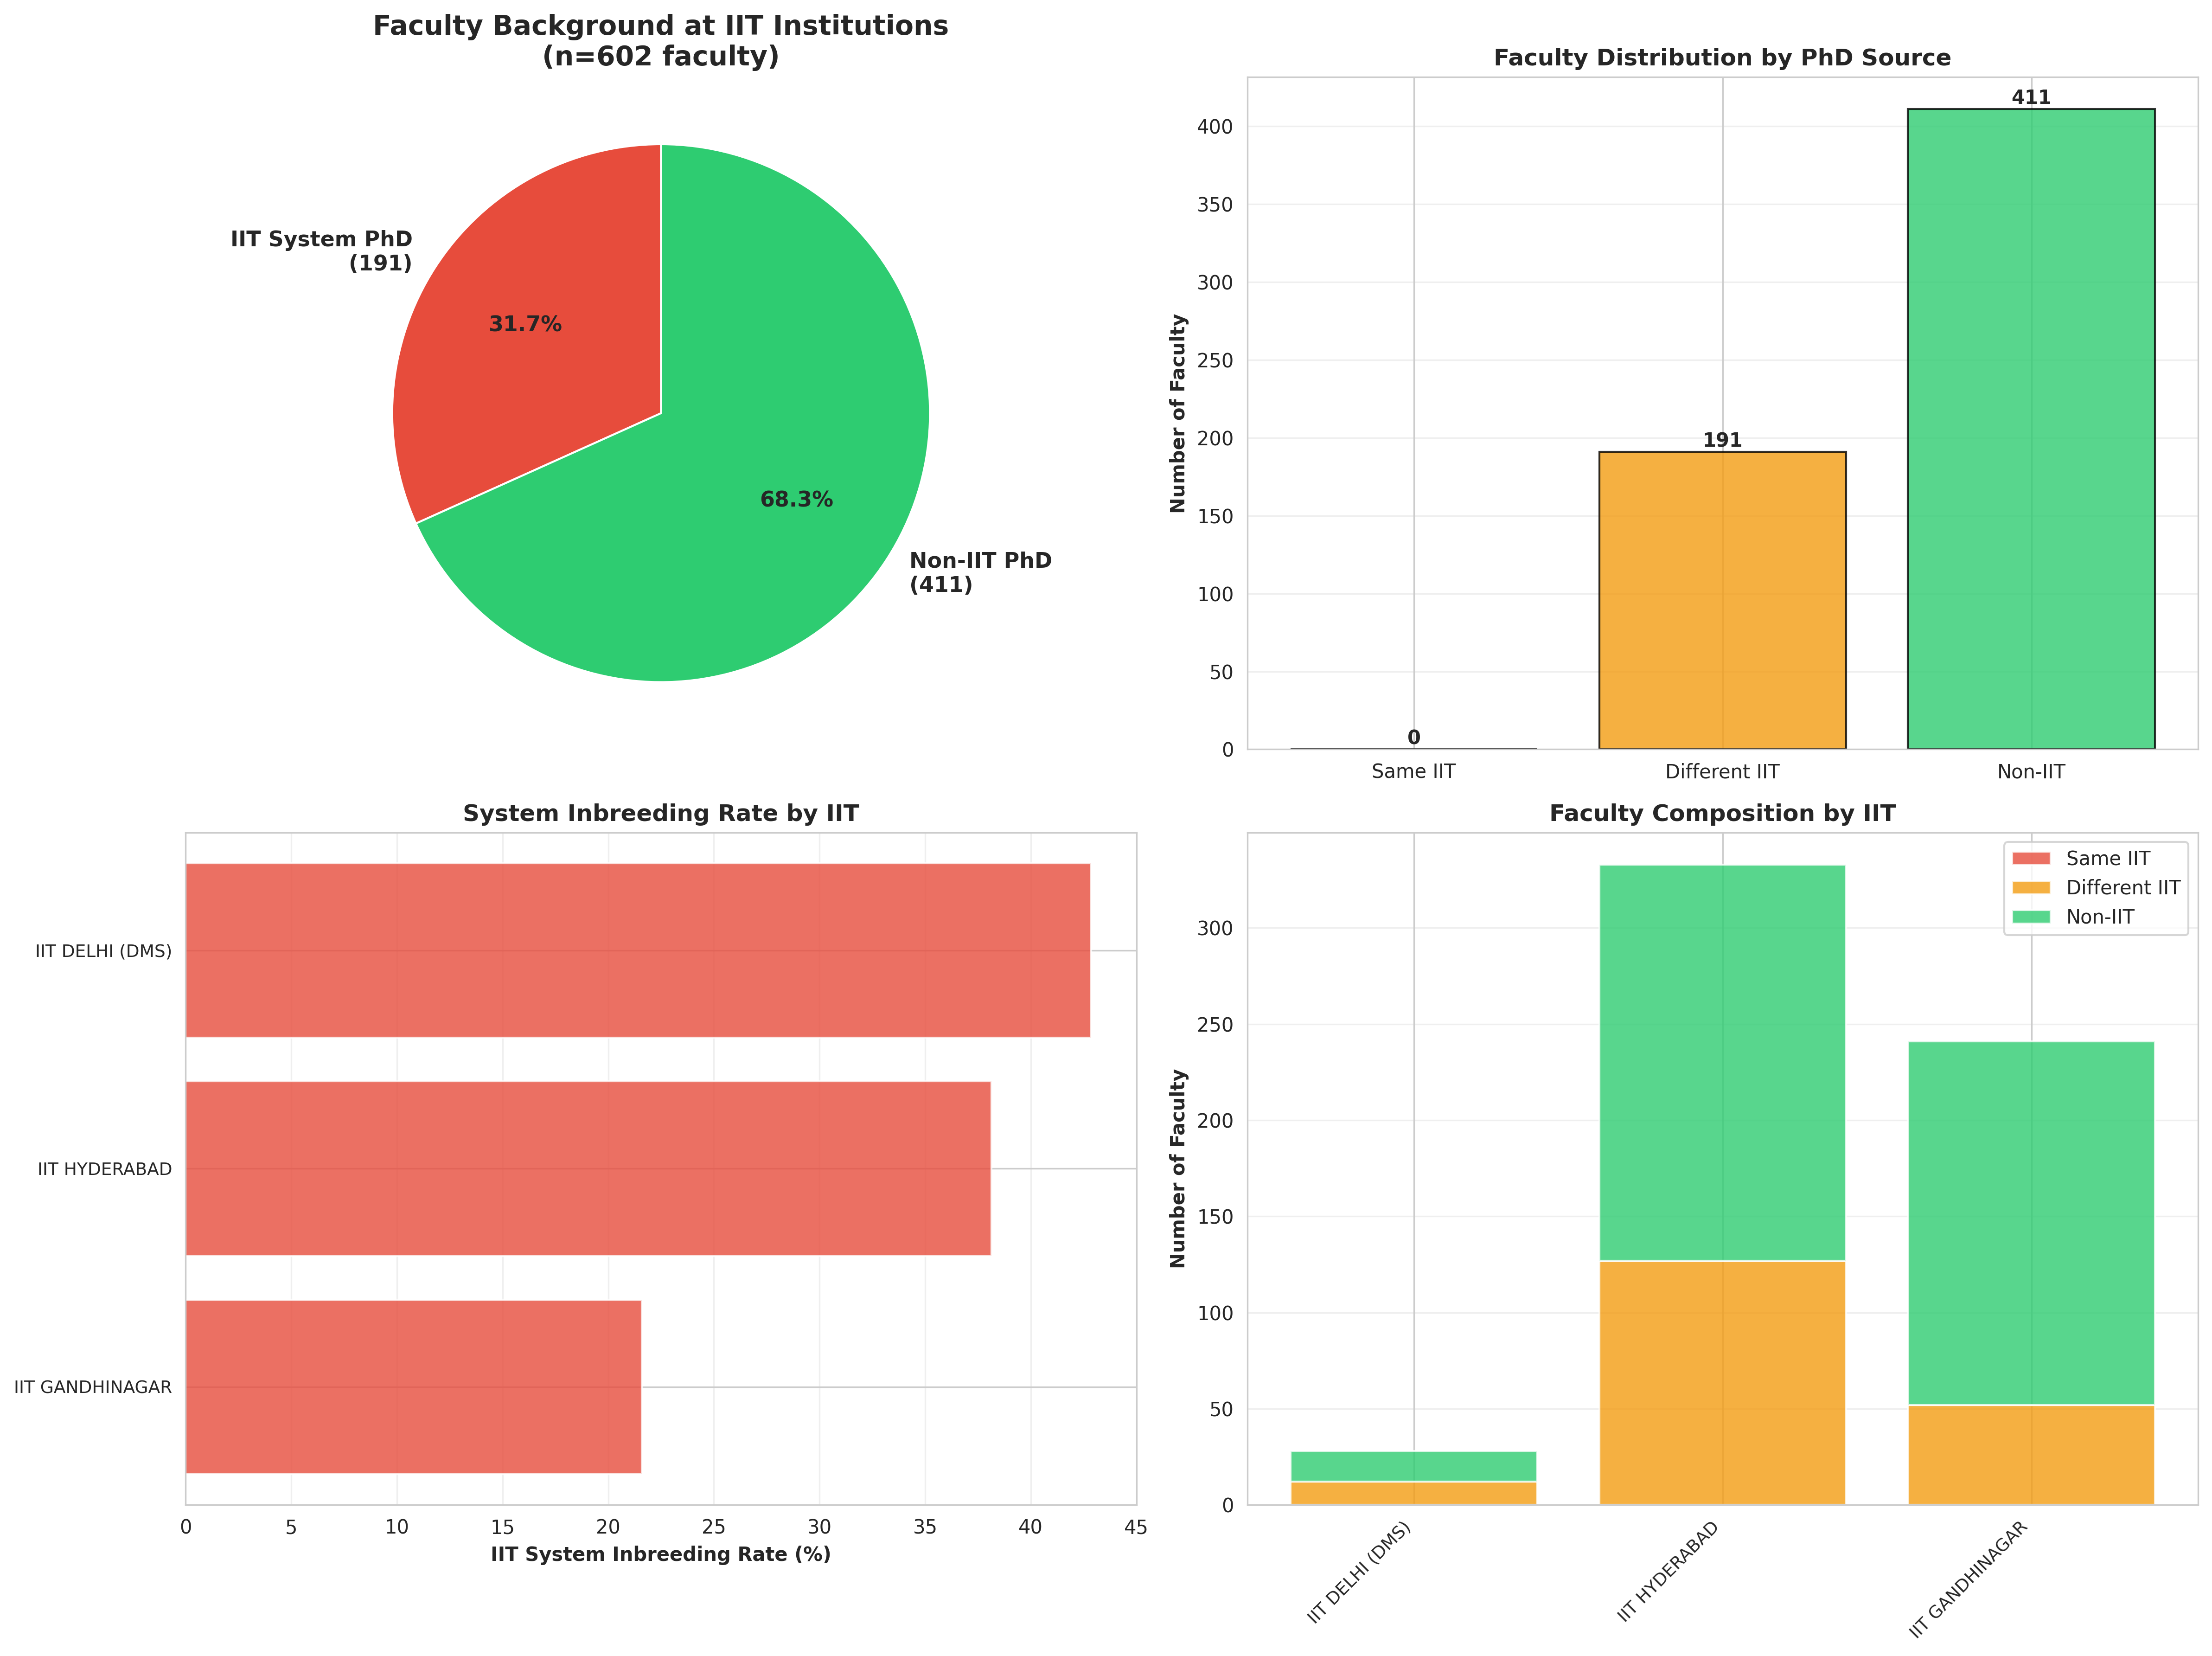

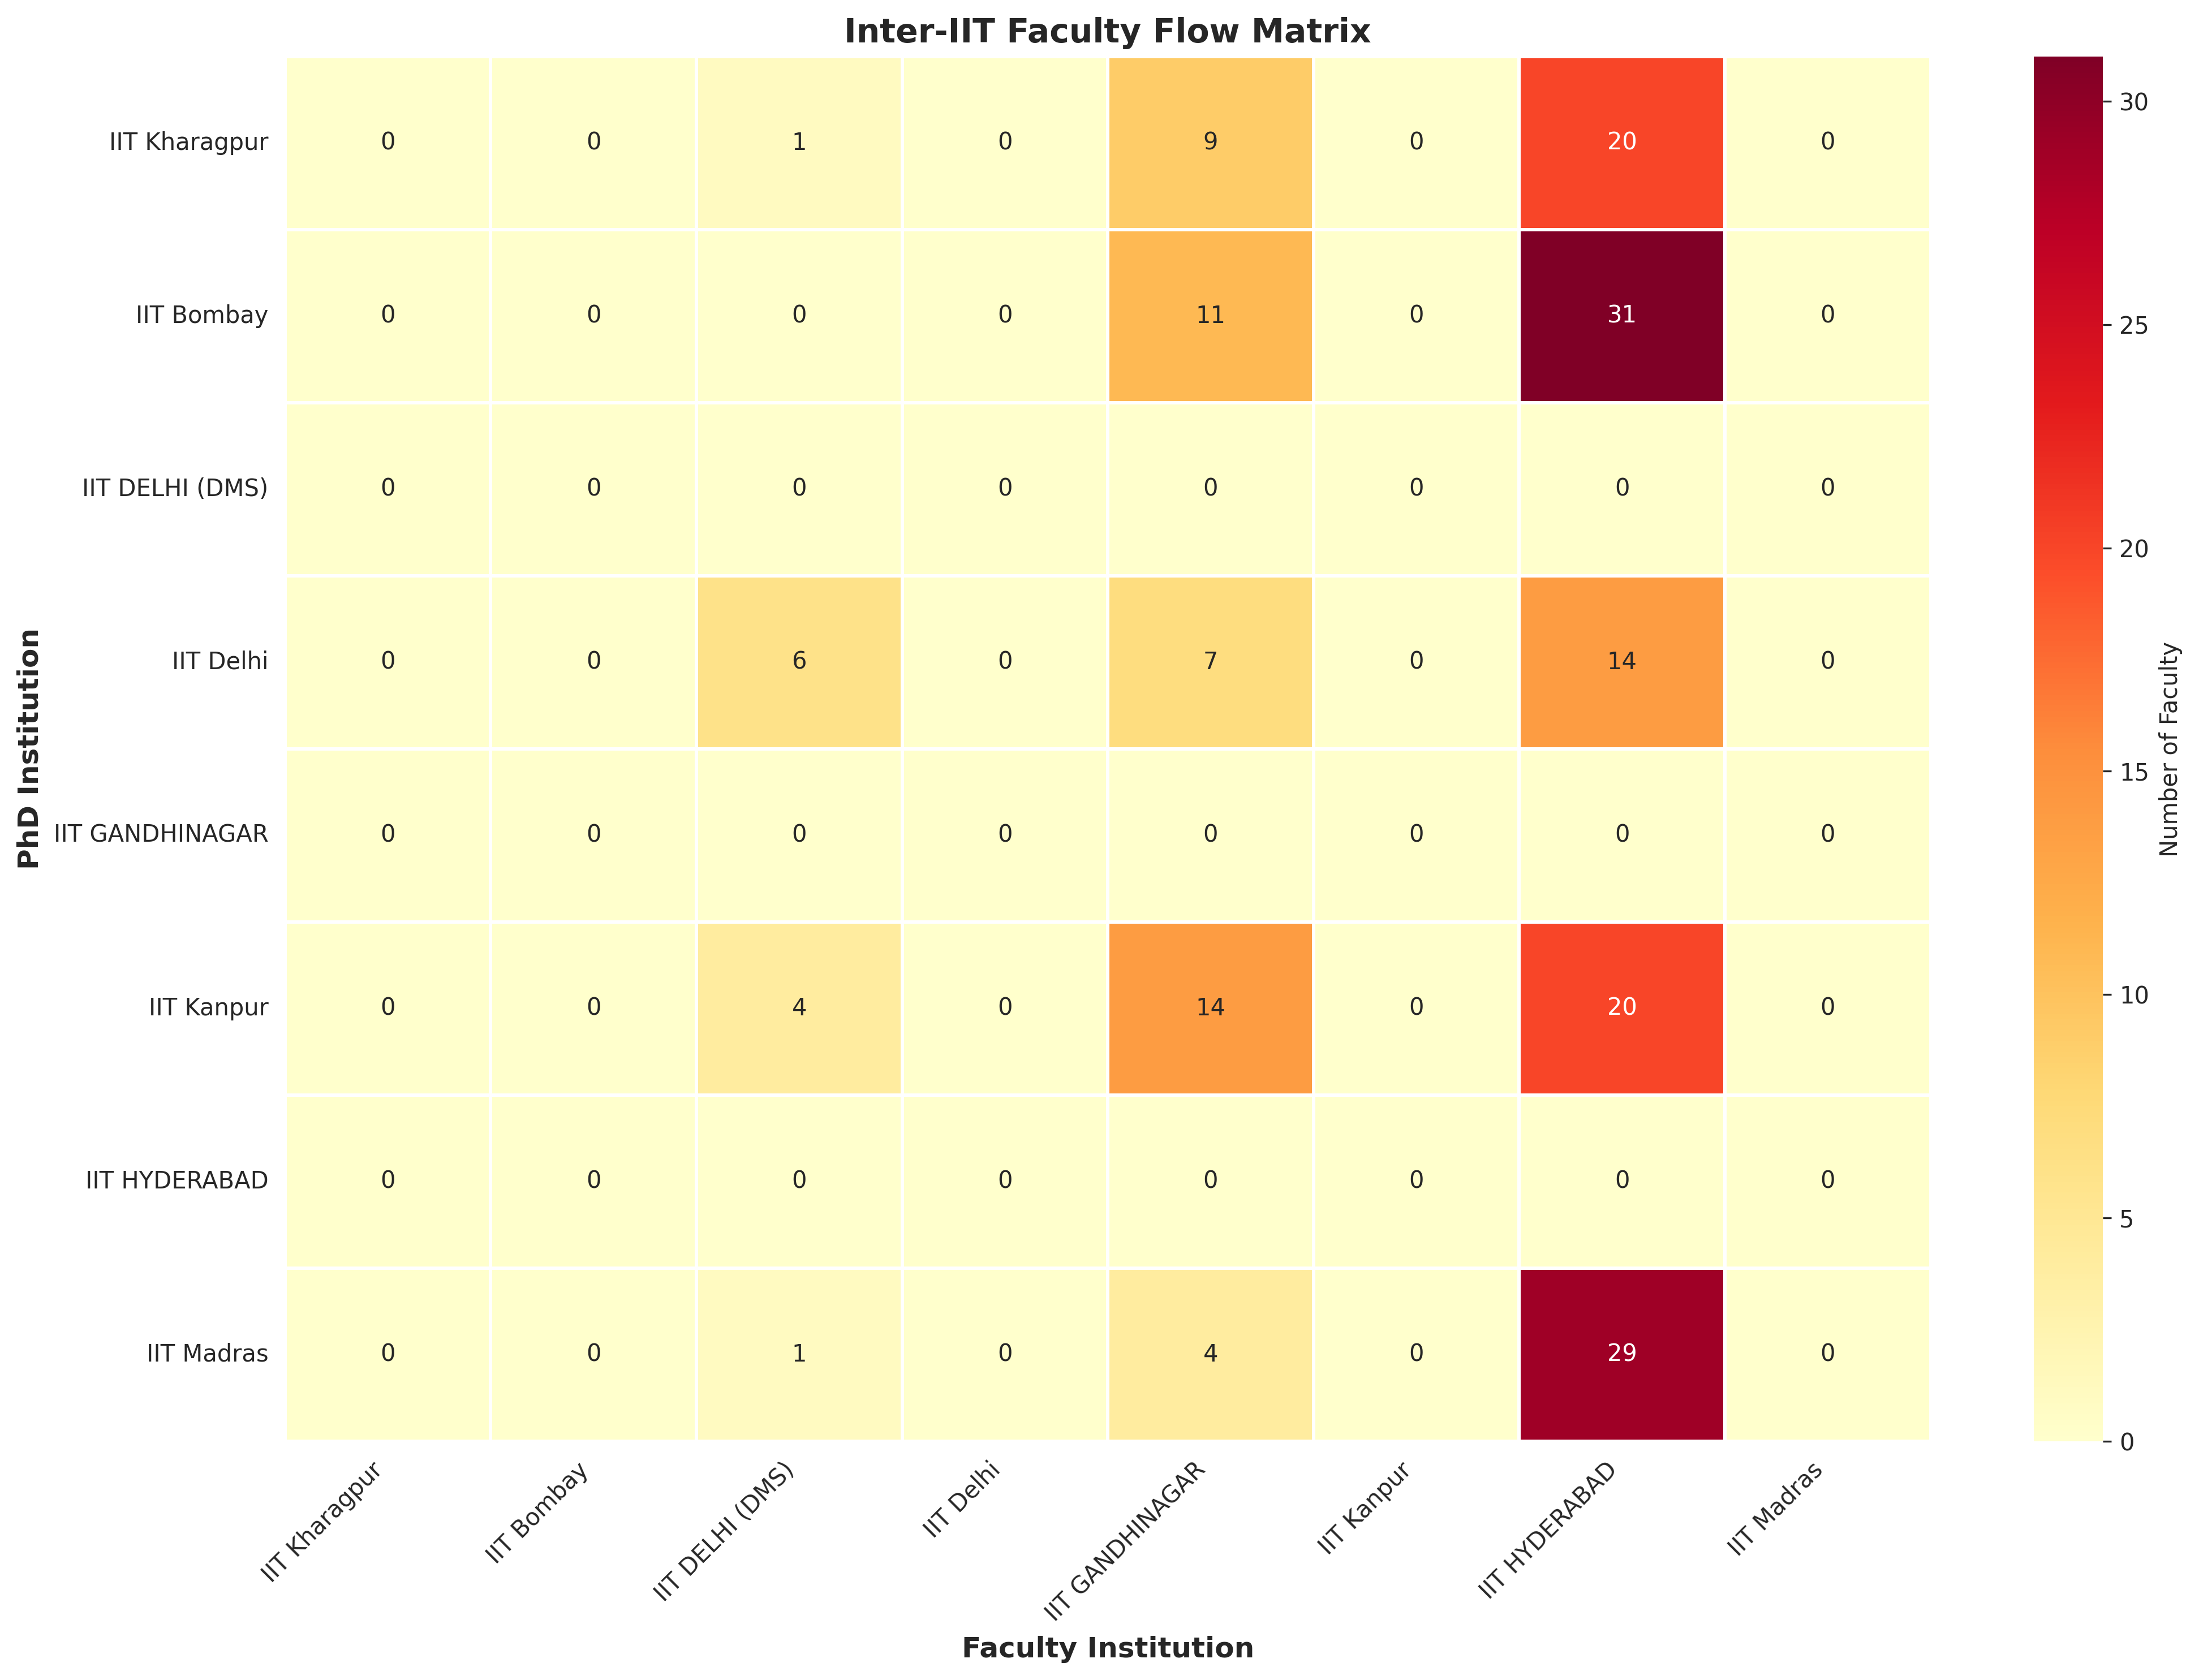

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np


print("Loading data from FINAL.csv...")
file_path = "/content/drive/MyDrive/Colab Notebooks/IIT_PHD.csv"
df = pd.read_csv(file_path)


df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


df = df.replace(['', 'nan', 'NaN', 'None'], pd.NA)

print(f"\nTotal records: {len(df)}")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())


valid_df = df.dropna(subset=['PHD', 'INSTITUTE'])
print(f"\nRecords with both PhD and Institute info: {len(valid_df)}")

print("\n" + "="*70)
print("IIT SYSTEM ACADEMIC INBREEDING ANALYSIS")
print("="*70)


KEYWORD = "IIT"


valid_df['phd_is_iit'] = valid_df['PHD'].str.contains(KEYWORD, case=False, na=False)


valid_df['institute_is_iit'] = valid_df['INSTITUTE'].str.contains(KEYWORD, case=False, na=False)


valid_df['is_iit_inbred'] = valid_df['phd_is_iit'] & valid_df['institute_is_iit']


valid_df['is_same_iit'] = valid_df['PHD'] == valid_df['INSTITUTE']


total_iit_faculty = valid_df['institute_is_iit'].sum()
iit_inbred_count = valid_df['is_iit_inbred'].sum()
same_iit_count = valid_df['is_same_iit'].sum()
iit_external_count = total_iit_faculty - iit_inbred_count

iit_faculty_non_iit_phd = valid_df[valid_df['institute_is_iit'] & ~valid_df['phd_is_iit']]

if total_iit_faculty > 0:
    iit_inbreeding_rate = (iit_inbred_count / total_iit_faculty) * 100
    same_iit_rate = (same_iit_count / total_iit_faculty) * 100
else:
    iit_inbreeding_rate = 0
    same_iit_rate = 0

print(f"\n📊 IIT SYSTEM STATISTICS:")
print(f"   Total faculty at IIT institutions: {total_iit_faculty}")
print(f"   Faculty with IIT PhD working at IIT (System Inbred): {iit_inbred_count}")
print(f"   Faculty with exact same IIT (e.g., IIT Delhi → IIT Delhi): {same_iit_count}")
print(f"   Faculty at IITs with non-IIT PhD: {len(iit_faculty_non_iit_phd)}")
print(f"   IIT System Inbreeding Rate: {iit_inbreeding_rate:.2f}%")
print(f"   Same IIT Rate: {same_iit_rate:.2f}%")


iit_inbred_faculty = valid_df[valid_df['is_iit_inbred']].copy()
if len(iit_inbred_faculty) > 0:
    print(f"\n📋 FACULTY WITH IIT PhD WORKING AT IIT (System Inbred):")
    print("-" * 70)
    for idx, row in iit_inbred_faculty.iterrows():
        marker = "⚠️ SAME" if row['is_same_iit'] else "🔄 DIFF"
        print(f"   {marker} {row['NAME']}")
        print(f"        PhD: {row['PHD']} → Current: {row['INSTITUTE']}")

if len(iit_faculty_non_iit_phd) > 0:
    print(f"\n✅ FACULTY AT IIT WITH NON-IIT PhD (External Hires):")
    print("-" * 70)
    for idx, row in iit_faculty_non_iit_phd.head(20).iterrows():
        print(f"   {row['NAME']}")
        print(f"        PhD: {row['PHD']} → Current: {row['INSTITUTE']}")
    if len(iit_faculty_non_iit_phd) > 20:
        print(f"   ... and {len(iit_faculty_non_iit_phd) - 20} more")

#
print("\n" + "="*70)
print("BREAKDOWN BY INDIVIDUAL IIT")
print("="*70)

iit_faculty_df = valid_df[valid_df['institute_is_iit']].copy()

if len(iit_faculty_df) > 0:
    iit_breakdown = pd.DataFrame()

    for iit in iit_faculty_df['INSTITUTE'].unique():
        iit_data = iit_faculty_df[iit_faculty_df['INSTITUTE'] == iit]

        total = len(iit_data)
        iit_phd_count = iit_data['phd_is_iit'].sum()
        non_iit_phd_count = total - iit_phd_count
        same_iit_count_inst = iit_data['is_same_iit'].sum()
        diff_iit_count = iit_phd_count - same_iit_count_inst

        iit_breakdown = pd.concat([iit_breakdown, pd.DataFrame({
            'IIT': [iit],
            'Total_Faculty': [total],
            'IIT_System_PhD': [iit_phd_count],
            'Same_IIT_PhD': [same_iit_count_inst],
            'Different_IIT_PhD': [diff_iit_count],
            'Non_IIT_PhD': [non_iit_phd_count],
            'System_Inbreeding_%': [(iit_phd_count/total*100) if total > 0 else 0],
            'Same_IIT_%': [(same_iit_count_inst/total*100) if total > 0 else 0]
        })], ignore_index=True)

    iit_breakdown = iit_breakdown.sort_values('System_Inbreeding_%', ascending=False)

    print("\n🏛️ IIT-WISE STATISTICS:")
    print("-" * 70)
    print(iit_breakdown.to_string(index=False))

print("\n" + "="*70)
print("IIT-TO-IIT FACULTY FLOW ANALYSIS")
print("="*70)

iit_to_iit_flow = iit_inbred_faculty[iit_inbred_faculty['PHD'] != iit_inbred_faculty['INSTITUTE']].copy()

if len(iit_to_iit_flow) > 0:
    print(f"\n🔄 INTER-IIT MOBILITY (Different IIT for PhD and Faculty):")
    print("-" * 70)

    flow_counts = iit_to_iit_flow.groupby(['PHD', 'INSTITUTE']).size().reset_index(name='Count')
    flow_counts = flow_counts.sort_values('Count', ascending=False)

    print("\nMost Common PhD IIT → Faculty IIT Paths:")
    for idx, row in flow_counts.head(15).iterrows():
        print(f"   {row['PHD']} → {row['INSTITUTE']}: {row['Count']} faculty")

print("\n📚 WHICH IITs PRODUCE FACULTY FOR OTHER IITs?")
print("-" * 70)
iit_phd_sources = iit_to_iit_flow['PHD'].value_counts()
for iit, count in iit_phd_sources.head(10).items():
    print(f"   {iit}: {count} graduates working at other IITs")


print("\n" + "="*70)
print("NON-IIT PhD SOURCES FOR IIT FACULTY")
print("="*70)

if len(iit_faculty_non_iit_phd) > 0:
    non_iit_sources = iit_faculty_non_iit_phd['PHD'].value_counts()
    print(f"\n🌍 TOP NON-IIT INSTITUTIONS SENDING FACULTY TO IITs:")
    print("-" * 70)
    for inst, count in non_iit_sources.head(15).items():
        print(f"   {inst}: {count} faculty")


print("GENERATING VISUALIZATIONS")
print("="*70)

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

if total_iit_faculty > 0:
    colors = ['#e74c3c', '#2ecc71']
    axes[0, 0].pie([iit_inbred_count, iit_external_count],
                   labels=[f'IIT System PhD\n({iit_inbred_count})',
                           f'Non-IIT PhD\n({iit_external_count})'],
                   autopct='%1.1f%%', colors=colors, startangle=90,
                   textprops={'fontsize': 11, 'weight': 'bold'})
    axes[0, 0].set_title(f'Faculty Background at IIT Institutions\n(n={total_iit_faculty} faculty)',
                         fontsize=14, fontweight='bold')

if total_iit_faculty > 0:
    categories = ['Same IIT', 'Different IIT', 'Non-IIT']
    values = [same_iit_count, iit_inbred_count - same_iit_count, iit_external_count]
    colors_bar = ['#e74c3c', '#f39c12', '#2ecc71']

    axes[0, 1].bar(categories, values, color=colors_bar, alpha=0.8, edgecolor='black')
    axes[0, 1].set_ylabel('Number of Faculty', fontweight='bold')
    axes[0, 1].set_title('Faculty Distribution by PhD Source', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)

    for i, v in enumerate(values):
        axes[0, 1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

if len(iit_breakdown) > 0:
    iit_names = iit_breakdown['IIT'].tolist()
    inbreeding_rates = iit_breakdown['System_Inbreeding_%'].tolist()

    axes[1, 0].barh(range(len(iit_names)), inbreeding_rates, color='#e74c3c', alpha=0.8)
    axes[1, 0].set_yticks(range(len(iit_names)))
    axes[1, 0].set_yticklabels(iit_names, fontsize=9)
    axes[1, 0].set_xlabel('IIT System Inbreeding Rate (%)', fontweight='bold')
    axes[1, 0].set_title('System Inbreeding Rate by IIT', fontsize=12, fontweight='bold')
    axes[1, 0].invert_yaxis()
    axes[1, 0].grid(axis='x', alpha=0.3)

if len(iit_breakdown) > 0:
    iit_names = iit_breakdown['IIT'].tolist()
    same_iit_vals = iit_breakdown['Same_IIT_PhD'].tolist()
    diff_iit_vals = iit_breakdown['Different_IIT_PhD'].tolist()
    non_iit_vals = iit_breakdown['Non_IIT_PhD'].tolist()

    x_pos = np.arange(len(iit_names))

    axes[1, 1].bar(x_pos, same_iit_vals, label='Same IIT', color='#e74c3c', alpha=0.8)
    axes[1, 1].bar(x_pos, diff_iit_vals, bottom=same_iit_vals,
                   label='Different IIT', color='#f39c12', alpha=0.8)
    axes[1, 1].bar(x_pos, non_iit_vals,
                   bottom=[i+j for i,j in zip(same_iit_vals, diff_iit_vals)],
                   label='Non-IIT', color='#2ecc71', alpha=0.8)

    axes[1, 1].set_xticks(x_pos)
    axes[1, 1].set_xticklabels(iit_names, rotation=45, ha='right', fontsize=9)
    axes[1, 1].set_ylabel('Number of Faculty', fontweight='bold')
    axes[1, 1].set_title('Faculty Composition by IIT', fontsize=12, fontweight='bold')
    axes[1, 1].legend(loc='upper right')
    axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('iit_system_inbreeding_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Saved: iit_system_inbreeding_analysis.png")

if len(iit_to_iit_flow) > 0 and len(flow_counts) > 0:
    fig, ax = plt.subplots(figsize=(14, 10))

    top_phd_iits = flow_counts['PHD'].value_counts().head(5).index.tolist()
    top_fac_iits = flow_counts['INSTITUTE'].value_counts().head(5).index.tolist()
    all_top_iits = list(set(top_phd_iits + top_fac_iits))

    flow_matrix = pd.DataFrame(0, index=all_top_iits, columns=all_top_iits)

    for idx, row in flow_counts.iterrows():
        if row['PHD'] in all_top_iits and row['INSTITUTE'] in all_top_iits:
            flow_matrix.loc[row['PHD'], row['INSTITUTE']] = row['Count']

    sns.heatmap(flow_matrix, annot=True, fmt='g', cmap='YlOrRd',
                linewidths=1, cbar_kws={'label': 'Number of Faculty'}, ax=ax)
    ax.set_xlabel('Faculty Institution', fontweight='bold', fontsize=12)
    ax.set_ylabel('PhD Institution', fontweight='bold', fontsize=12)
    ax.set_title('Inter-IIT Faculty Flow Matrix', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.savefig('iit_flow_matrix.png', dpi=300, bbox_inches='tight')
    print("✓ Saved: iit_flow_matrix.png")

print("\n" + "="*70)
print("EXPORTING REPORTS")
print("="*70)

if len(iit_breakdown) > 0:
    iit_breakdown.to_csv('iit_breakdown_stats.csv', index=False)
    print("✓ Saved: iit_breakdown_stats.csv")

if len(iit_inbred_faculty) > 0:
    inbred_export = iit_inbred_faculty[['NAME', 'PHD', 'INSTITUTE']].copy()
    inbred_export['Same_IIT'] = iit_inbred_faculty['is_same_iit']
    inbred_export.columns = ['Faculty_Name', 'PhD_Institution', 'Current_Institution', 'Same_IIT']
    inbred_export.to_csv('iit_system_inbred_faculty.csv', index=False)
    print("✓ Saved: iit_system_inbred_faculty.csv")

if len(iit_faculty_non_iit_phd) > 0:
    external_export = iit_faculty_non_iit_phd[['NAME', 'PHD', 'INSTITUTE']].copy()
    external_export.columns = ['Faculty_Name', 'PhD_Institution', 'Current_Institution']
    external_export.to_csv('iit_external_hires.csv', index=False)
    print("✓ Saved: iit_external_hires.csv")


if len(iit_to_iit_flow) > 0:
    flow_counts.to_csv('iit_to_iit_flow.csv', index=False)
    print("✓ Saved: iit_to_iit_flow.csv")

if len(iit_faculty_non_iit_phd) > 0:
    non_iit_source_stats = iit_faculty_non_iit_phd['PHD'].value_counts().reset_index()
    non_iit_source_stats.columns = ['Institution', 'Faculty_Count']
    non_iit_source_stats.to_csv('non_iit_sources_for_iits.csv', index=False)
    print("✓ Saved: non_iit_sources_for_iits.csv")


print("\n" + "="*70)
print("SUMMARY REPORT")
print("="*70)

print(f"""
📈 KEY FINDINGS:

1. IIT System Inbreeding:
   - Total faculty at IIT institutions: {total_iit_faculty}
   - Faculty with IIT PhD: {iit_inbred_count} ({iit_inbreeding_rate:.1f}%)
   - Faculty with same IIT PhD: {same_iit_count} ({same_iit_rate:.1f}%)
   - Faculty with non-IIT PhD: {iit_external_count} ({(iit_external_count/total_iit_faculty*100) if total_iit_faculty > 0 else 0:.1f}%)

2. Inter-IIT Mobility:
   - Faculty who did PhD at one IIT and work at another: {len(iit_to_iit_flow)}

3. Individual IIT Analysis:
   - Number of IITs analyzed: {len(iit_breakdown) if len(iit_breakdown) > 0 else 0}
   - IIT with highest system inbreeding rate: {iit_breakdown.iloc[0]['IIT'] if len(iit_breakdown) > 0 else 'N/A'}
   - Rate: {iit_breakdown.iloc[0]['System_Inbreeding_%'] if len(iit_breakdown) > 0 else 0:.1f}%

4. External Sources:
   - Top non-IIT institution: {non_iit_sources.index[0] if len(iit_faculty_non_iit_phd) > 0 else 'N/A'}
   - Faculty from this institution: {non_iit_sources.iloc[0] if len(iit_faculty_non_iit_phd) > 0 else 0}
""")

print("="*70)
print("✅ ANALYSIS COMPLETE!")
print("="*70)
print("\nGenerated files:")
print("1. iit_system_inbreeding_analysis.png - Overview charts")
print("2. iit_flow_matrix.png - Inter-IIT faculty flow")
print("3. iit_breakdown_stats.csv - Statistics per IIT")
print("4. iit_system_inbred_faculty.csv - List of IIT system inbred faculty")
print("5. iit_external_hires.csv - List of non-IIT PhD faculty at IITs")
print("6. iit_to_iit_flow.csv - Inter-IIT mobility patterns")
print("7. non_iit_sources_for_iits.csv - External institutions sending faculty to IITs")

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive
